# **Creating a WordCloud Using Olist Dataset Comments**

In [213]:
!pip install wordcloud # We are installing it because the library is not available.

Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '#'


In [214]:
import pandas as pd               # Imported for data frames.
from nltk.corpus import stopwords # Imported to remove stop words. (1)
from wordcloud import WordCloud   # Imported to create word clouds.
import matplotlib.pyplot as plt   # Used for visualization.
import re                         # Imported to handle and remove irregular or unwanted expressions.
import nltk                       
nltk.download('stopwords')        # Downloading stopwords for removal. (2)
from PIL import Image             # Imported to add a mask image to the word cloud.
import numpy as np                # Imported to create numpy arrays.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OMEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [215]:
df = pd.read_csv("olist_order_reviews_dataset.csv") # We are putting the data into a pandas DataFrame.

In [216]:
df

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                  NaN   
4                 5                  NaN   
...             ...                  ...   
99219             5                  NaN   
99220             5                  NaN   
99221             5                  NaN   
99222             4                  NaN   
99223             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN  2018-01-18 00:00:00   
1                                                    NaN  2018-03-10 00:00:00   
2                                                    NaN  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
99219                                                NaN  2018-07-07 00:00:00   
99220                                                NaN  2017-12-09 00:00:00   
99221  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99222                                                NaN  2018-07-01 00:00:00   
99223  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[99224 rows x 7 columns]

In [217]:
df = df.drop(columns = ["review_id", "order_id", "review_comment_title", 
                        "review_creation_date", "review_answer_timestamp", "review_score"])
# We can remove the columns except for the one containing the comments, as we don't need the other columns.

In [218]:
df

review_comment_message
0                                                    NaN
1                                                    NaN
2                                                    NaN
3                  Recebi bem antes do prazo estipulado.
4      Parabéns lojas lannister adorei comprar pela I...
...                                                  ...
99219                                                NaN
99220                                                NaN
99221  Excelente mochila, entrega super rápida. Super...
99222                                                NaN
99223  meu produto chegou e ja tenho que devolver, po...

[99224 rows x 1 columns]

In [219]:
df.isnull().sum()

# There are 58,247 empty comments in the dataset, which might indicate that no comments were made 
# for some products or inappropriate comments were not added. Therefore, it may be appropriate to remove these empty values.

review_comment_message    58247
dtype: int64

In [220]:
df = df.dropna()

# We have removed all null expressions.

In [221]:
df

review_comment_message
3                  Recebi bem antes do prazo estipulado.
4      Parabéns lojas lannister adorei comprar pela I...
9      aparelho eficiente. no site a marca do aparelh...
12       Mas um pouco ,travando...pelo valor ta Boa.\r\n
15     Vendedor confiável, produto ok e entrega antes...
...                                                  ...
99205  para este produto recebi de acordo com a compr...
99208  Entregou dentro do prazo. O produto chegou em ...
99215  O produto não foi enviado com NF, não existe v...
99221  Excelente mochila, entrega super rápida. Super...
99223  meu produto chegou e ja tenho que devolver, po...

[40977 rows x 1 columns]

In [222]:
df.isnull().sum()

# The dataset containing the comments is now prepared.

review_comment_message    0
dtype: int64

In [223]:
stopwords = set(stopwords.words('portuguese'))


# We need to identify and parse words in Portuguese that do not have a meaningful standalone meaning. 
# Failure to do so may lead to incorrect output.

In [224]:
stopwords

# We have extracted the Portuguese stop words from this dictionary.

{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',
 'houverí

In [225]:
text = " ".join(review for review in df['review_comment_message'])

# We are combining all comment lines into a single text. Within this text, we will search for the most frequent expressions. 
# However, there are unwanted expressions in the comment text, such as emojis, which also need to be parsed.

In [226]:
text

'Recebi bem antes do prazo estipulado. Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho Mas um pouco ,travando...pelo valor ta Boa.\r\n Vendedor confiável, produto ok e entrega antes do prazo. GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E ESSA COMPRA AGORA ME DECPCIONOU Péssimo Loja nota 10 obrigado pela atençao amim dispensada A compra foi realizada facilmente.\r\nA entrega foi efetuada muito antes do prazo dado.\r\nO produto já começou a ser usado e até o presente,\r\nsem problemas. relógio muito bonito e barato. Não gostei ! Comprei gato por lebre Sempre compro pela Internet e a entrega ocorre antes do prazo combinado, que acredito ser o prazo máximo. No stark o prazo máximo já se esgotou e ainda não recebi o produto. Recebi exatamente o que esperava. As dema

In [227]:
text = re.sub('[^a-zA-Z0-9 \n\.]', '', text)

# With this command line, we have also removed unwanted expressions.

In [228]:
text

'Recebi bem antes do prazo estipulado. Parabns lojas lannister adorei comprar pela Internet seguro e prtico Parabns a todos feliz Pscoa aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que  o mesmo aparelho Mas um pouco travando...pelo valor ta Boa.\n Vendedor confivel produto ok e entrega antes do prazo. GOSTARIA DE SABER O QUE HOUVE SEMPRE RECEBI E ESSA COMPRA AGORA ME DECPCIONOU Pssimo Loja nota 10 obrigado pela atenao amim dispensada A compra foi realizada facilmente.\nA entrega foi efetuada muito antes do prazo dado.\nO produto j comeou a ser usado e at o presente\nsem problemas. relgio muito bonito e barato. No gostei  Comprei gato por lebre Sempre compro pela Internet e a entrega ocorre antes do prazo combinado que acredito ser o prazo mximo. No stark o prazo mximo j se esgotou e ainda no recebi o produto. Recebi exatamente o que esperava. As demais encomendas de outros vendedo

In [229]:
text = " ".join(word for word in text.split() if word not in stopwords)

# We are also removing the expressions from the text that are listed in the stop words dictionary.

In [230]:
text

# In this case, our text expression is now ready for visualization.

'Recebi bem antes prazo estipulado. Parabns lojas lannister adorei comprar Internet seguro prtico Parabns todos feliz Pscoa aparelho eficiente. site marca aparelho impresso 3desinfector chegar outro nome...atualizar marca correta vez aparelho Mas pouco travando...pelo valor ta Boa. Vendedor confivel produto ok entrega antes prazo. GOSTARIA DE SABER O QUE HOUVE SEMPRE RECEBI E ESSA COMPRA AGORA ME DECPCIONOU Pssimo Loja nota 10 obrigado atenao amim dispensada A compra realizada facilmente. A entrega efetuada antes prazo dado. O produto j comeou usado at presente problemas. relgio bonito barato. No gostei Comprei gato lebre Sempre compro Internet entrega ocorre antes prazo combinado acredito prazo mximo. No stark prazo mximo j esgotou ainda recebi produto. Recebi exatamente esperava. As demais encomendas outros vendedores atrasaram chegou prazo. Recomendo boa T completamente apaixonada loja super responsvel confivel Nada chegar pedido. Muito bom. cheiroso. otimo vendedor chegou ate antes

In [231]:
wordcloud = WordCloud(background_color="black").generate(text)


# We are processing the text created as a black background. Inside WordCloud, if we include 'stopwords = stopwords', 
# we can also exclude the stop words we defined earlier as parameters.

In [232]:
wordcloud

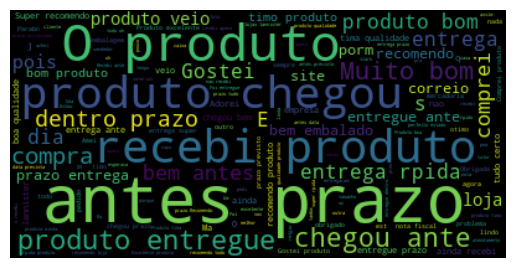

In [233]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# The output of a classic word cloud is as follows, but since we are working with comment data, 
# we want to mask it with a background image.

In [234]:
mask = np.array(Image.open("mask_image.png"))

# This PNG is in the shape of a comment cloud, and we will use this image for masking.

In [235]:
wordcloud = WordCloud(background_color="black", mask=mask).generate(text)

# With the 'mask' parameter, we can visualize the words as if they were inside a speech bubble.

In [236]:
wordcloud

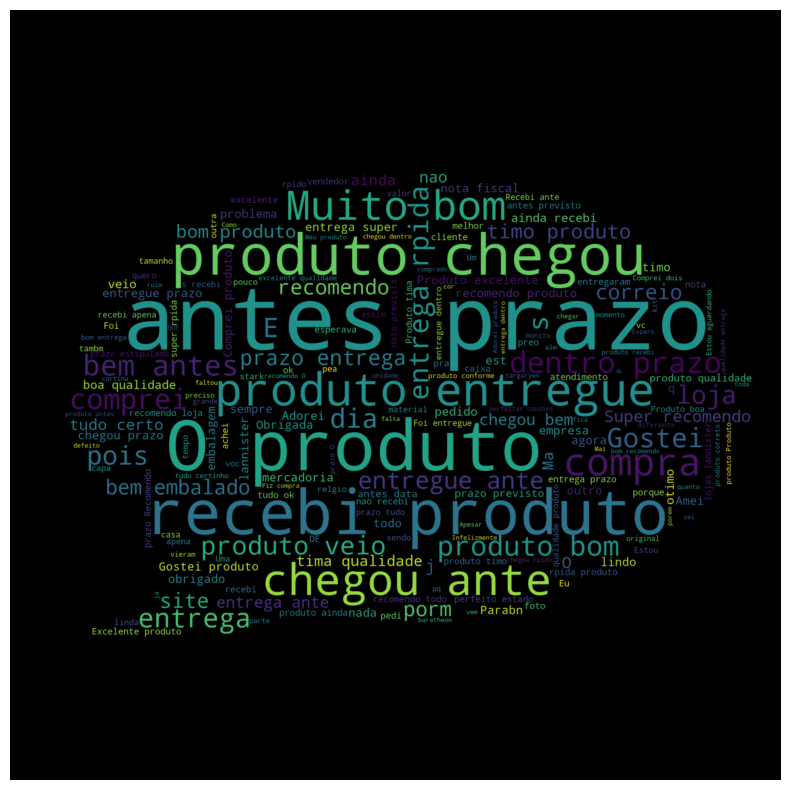

In [237]:
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear') # Here, the image is drawn, and the image is displayed in a 'bilinear' manner
                                                # which is smoother.
plt.axis("off")                                 # I added it to remove the axis values.
plt.show()